# Generate Histograms
- Using matplotlib 1.4.3, generate visualizations of noisy data output from dpcomp Identity, HB, MWEM, and DAWA differential privacy algorithms.
- Includes option to perform normalized non-negative rounding post processing

#### Setup and Methodoloy
- 4 DPComp Algorithms: Identity, HB, MWEM, and DAWA
- 2 Datasets explored: HEPTH and BIDS-ALL
- 2 Sample sizes explored: 10e4, 10e6
- 2 domain sizes explored: 1024, 4096- 2 Workloads explored: Identity and Prefix1D
- Normalized non-negative rounding option for all plots
##### The visualizations generated were a result of an exhaustive cross-product of all possible combinations (64 total visualizations)
##### Notable conclusions are made in the accompanying paper.

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Settings for use on dbcluster.umass.edu machine
import sys,os
# This path needs to be changed to specify the root of the dpcomp_core base code
DPCOMP_PATH = '/nfs/avid/data1/miklau/dpcomp-parent/dpcomp_core_op'
sys.path.append(DPCOMP_PATH)
os.environ['DPCOMP_CORE']= DPCOMP_PATH

In [164]:
matplotlib.__version__

'1.4.3'

In [156]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set_style("whitegrid")


In [157]:
from dpcomp_core.algorithm import *
from dpcomp_core import dataset
from dpcomp_core import util
from dpcomp_core import workload

In [158]:
# number of bins
domain = (1024,)
# domain = 1024

# epsilon = 0.001
epsilon = 0.1

# nickname = 'HEPTH'
nickname = 'BIDS-ALL'

# number of data points from sample_to_scale data generation
sample = 1e6
# sample = 1e4
seed = 1

# Instantiate dataset
data = dataset.DatasetSampledFromFile(nickname=nickname, 
                                     sample_to_scale=sample, 
                                     reduce_to_dom_shape=domain, 
                                     seed=111)

# Instantiate workload (experimented with two different workloads)
w = workload.Identity(domain_shape=domain)
# w = workload.Prefix1D(domain_shape_int=domain)


# Instantiate algorithms
Identity_ = identity.identity_engine()
HB_ = HB.HB_engine()
MWEM_ = mwemND.mwemND_engine()
DAWA_ = dawa.dawa_engine()

algorithms = [(Identity_, "Identity"), (HB_, "HB"), (MWEM_, "MWEM"), (DAWA_, "DAWA")]

ORIGINAL dataframe created, now plotting


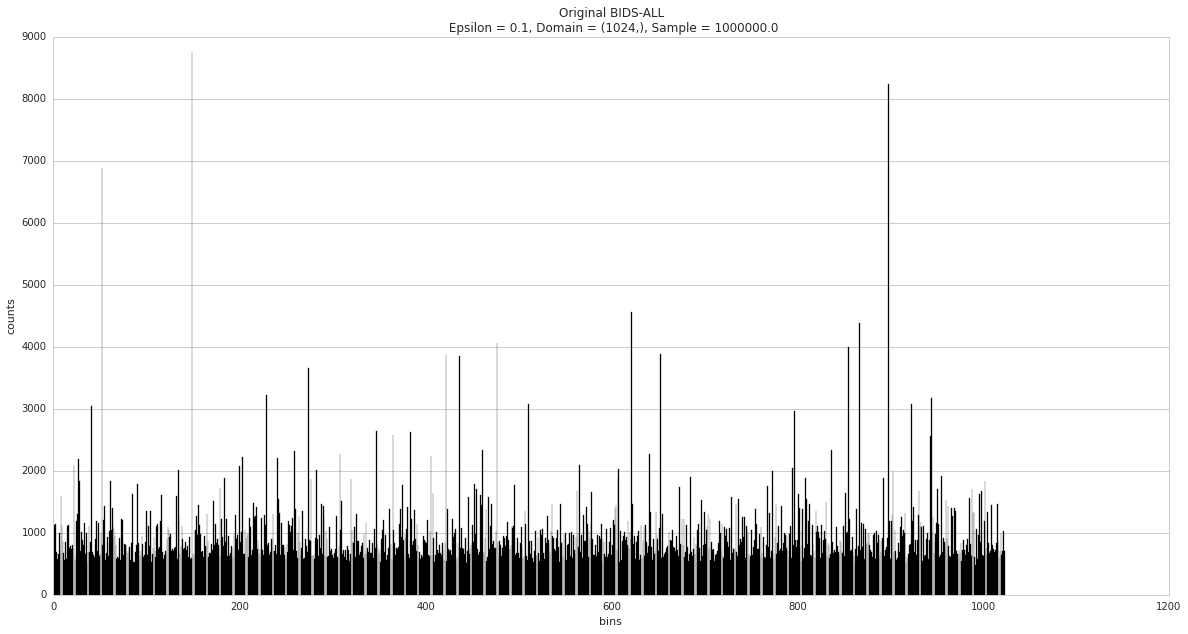

In [159]:
# original data
dat = data.payload

df = pd.DataFrame(dat)
x = df.index.values
y = df.values.flatten()
print "ORIGINAL dataframe created, now plotting"
orig = sns.barplot(x=x, y=y, color='black')
#xticks causes grey bars
orig.set_xticks([0, 200, 400, 600, 800, 1000, 1200])
orig.set_xticklabels([0, 200, 400, 600, 800, 1000, 1200])
# orig.set_ylim([0,12000])
orig.set(xlabel='bins', ylabel='counts')
orig.set_title('Original %s \n Epsilon = %s, Domain = %s, Sample = %s' % (nickname, str(epsilon), str(domain), str(sample)))
sns.plt.show()
plt.gcf().clear()


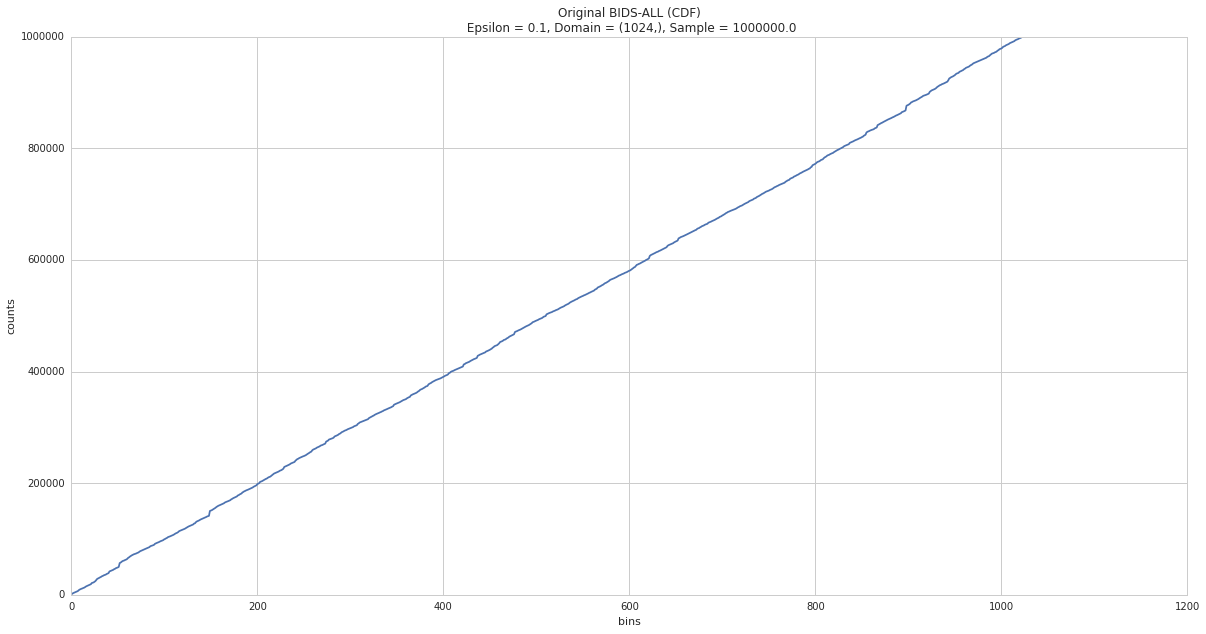

In [160]:

datCDF= np.cumsum(dat)
fig, cdf = plt.subplots()
cdf.plot(datCDF)
cdf.set_xticks([0, 200, 400, 600, 800, 1000, 1200])
cdf.set_xticklabels([0, 200, 400, 600, 800, 1000, 1200])
# cdf.set_ylim([0, 1200000])
# cdf.set_ylim([0, 12000])
cdf.set(xlabel='bins', ylabel='counts')
cdf.set_title('Original %s (CDF) \n Epsilon = %s, Domain = %s, Sample = %s' % (nickname, str(epsilon), str(domain), str(sample)))
sns.plt.show()
plt.gcf().clear()


999687.117144


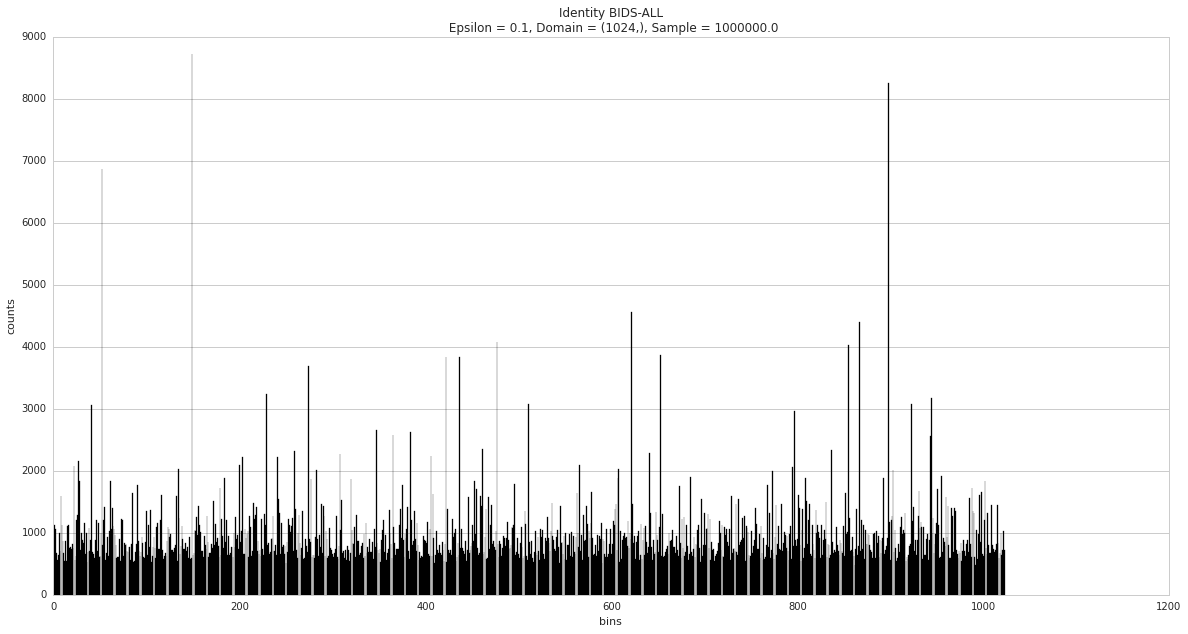

[    759    1880    3026 ...,  998251  999286 1000000]


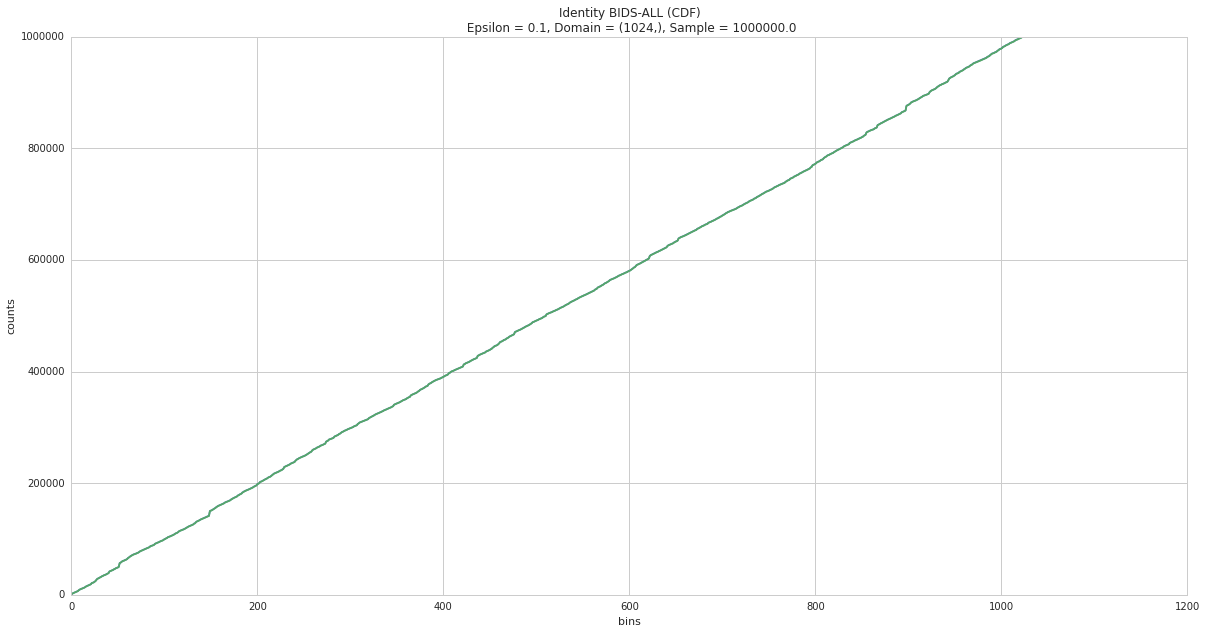

1000005.5357


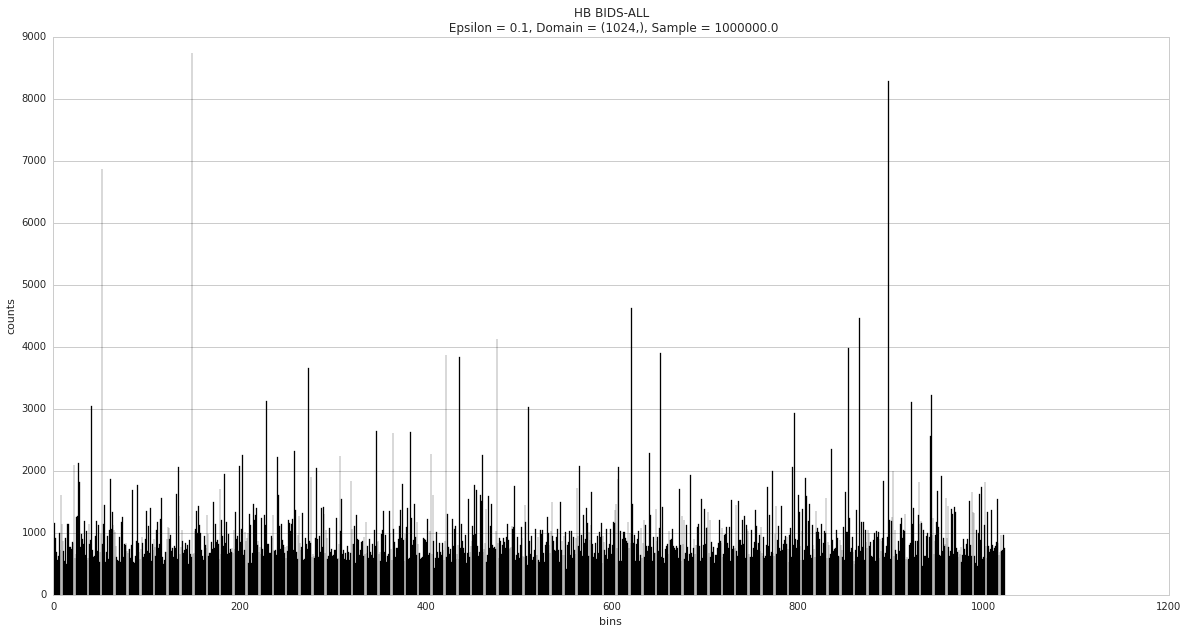

[    759    1880    3026 ...,  998251  999286 1000000]


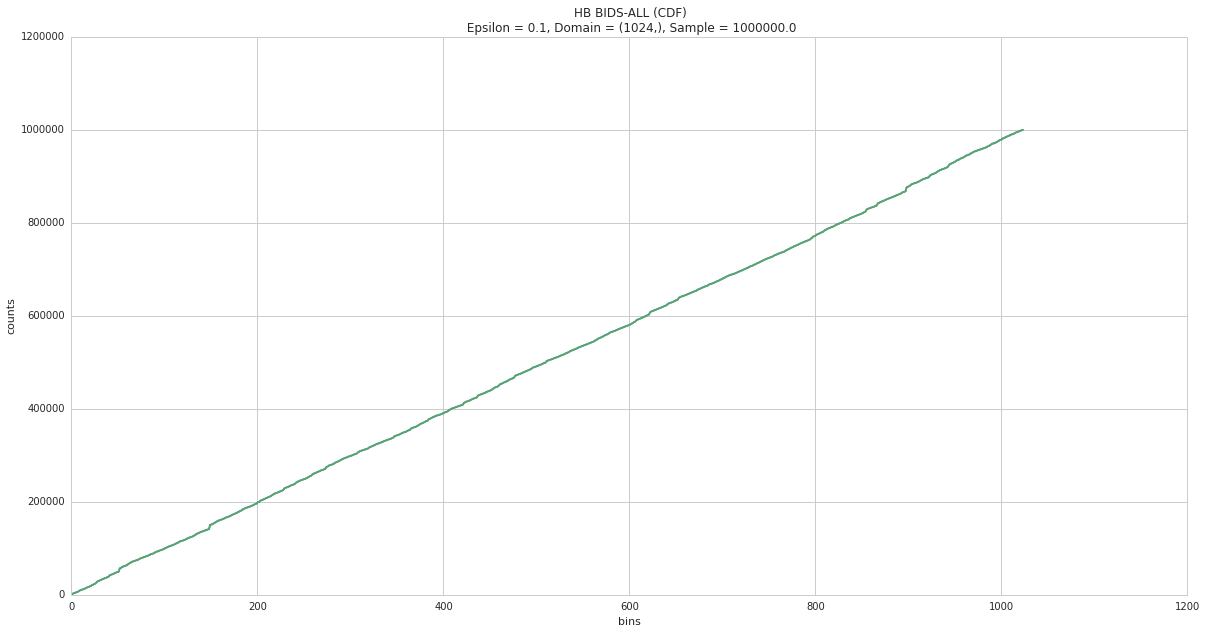

1000000.0


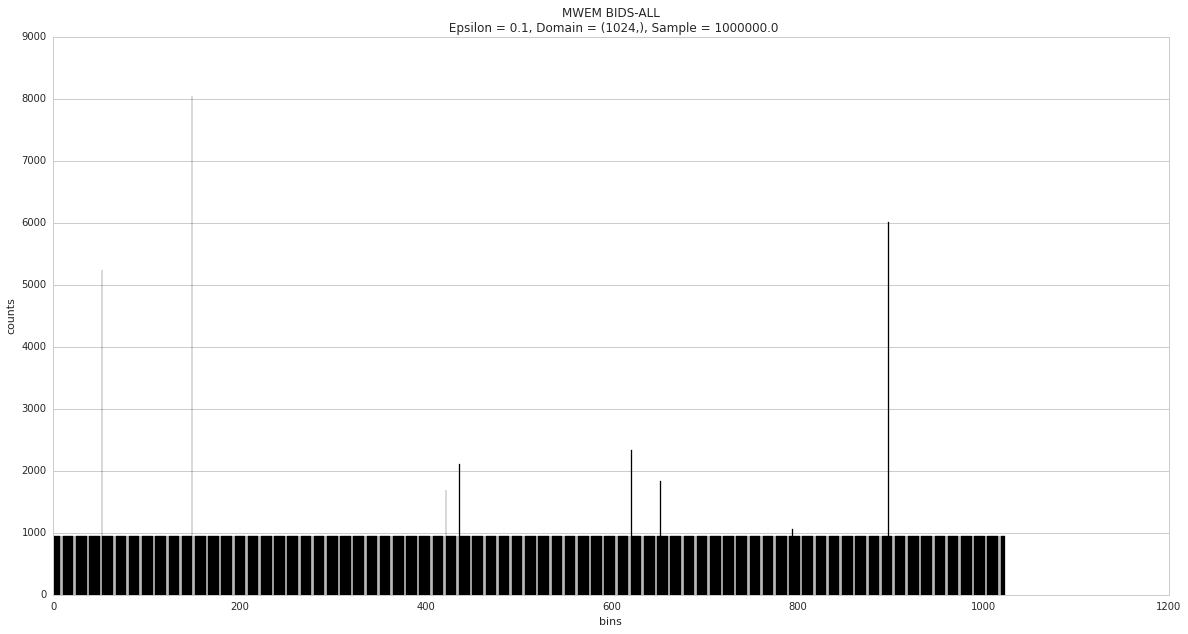

[    759    1880    3026 ...,  998251  999286 1000000]


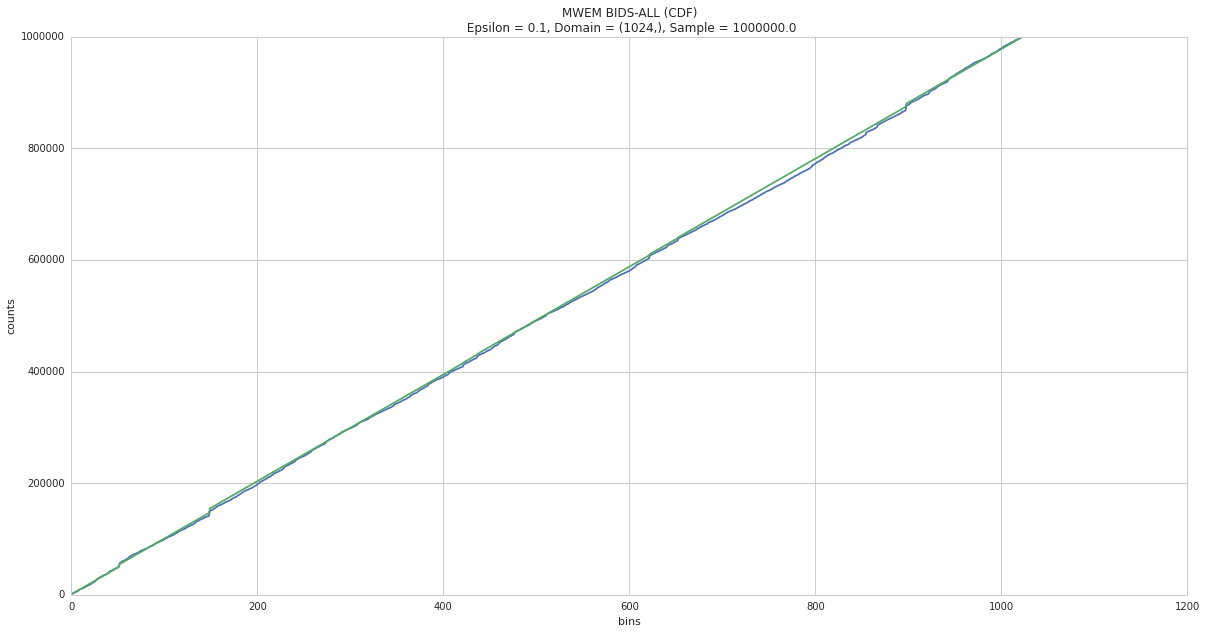

1000419.35558


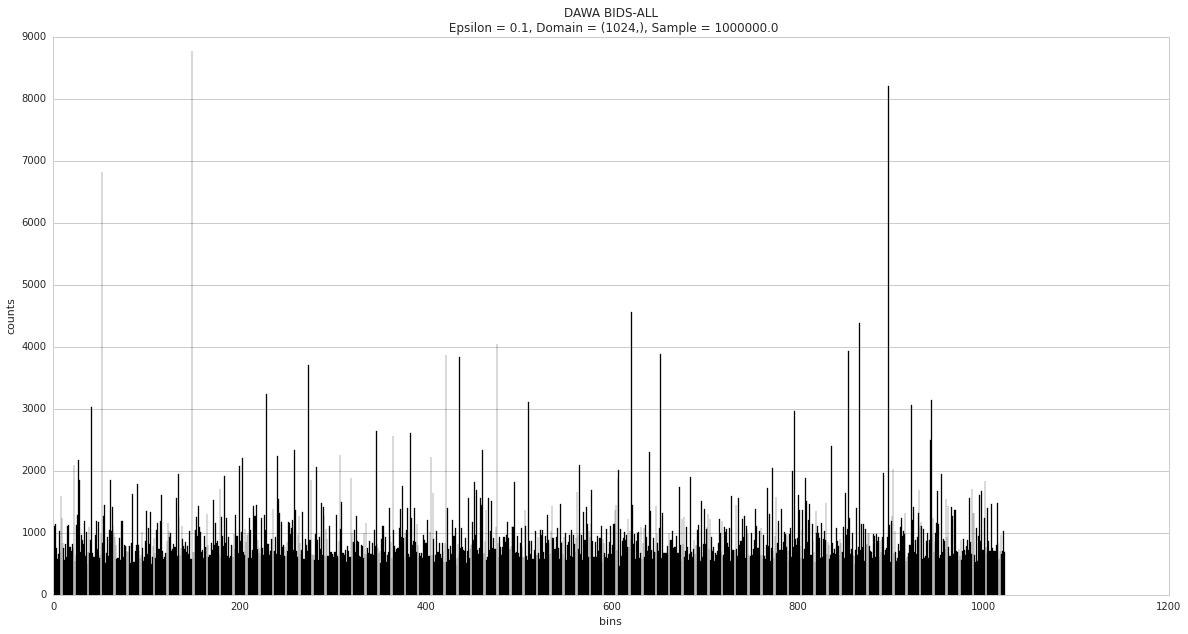

[    759    1880    3026 ...,  998251  999286 1000000]


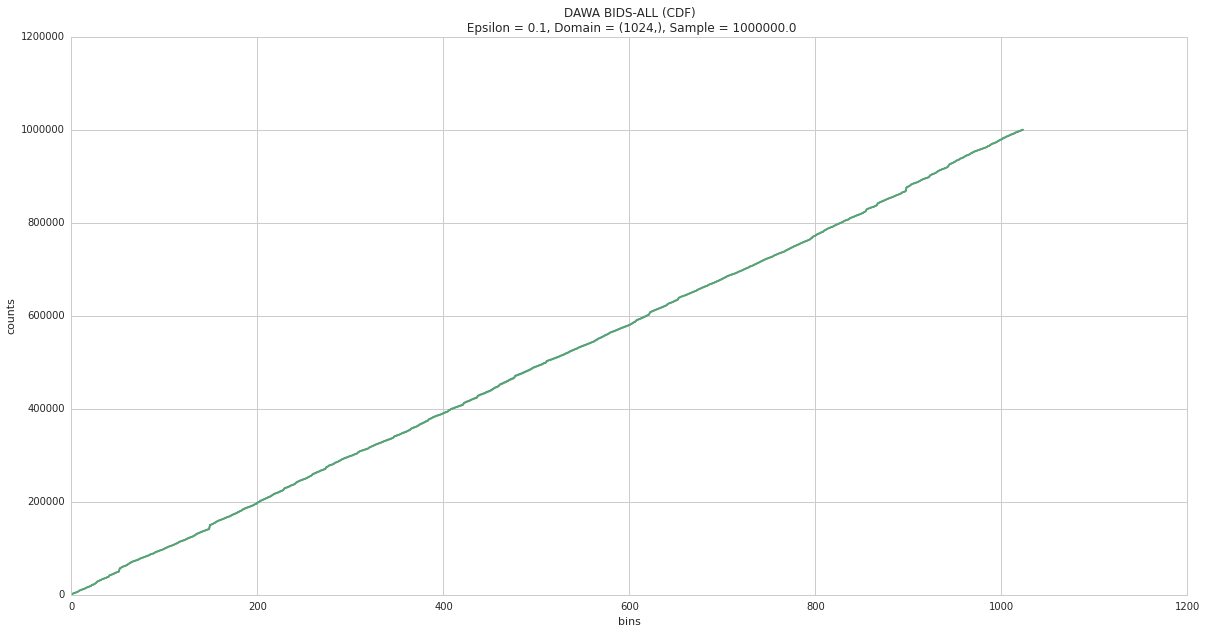

In [162]:

# Calculate and plot noisy estimates for x 
for alg in algorithms:
    x_hat = alg[0].Run(w, dat, epsilon, seed)
    df_hat = pd.DataFrame(x_hat)
    x_hat_data = df_hat.index.values
    y_hat_data = df_hat.values.flatten()
    print sum (y_hat_data)
    
## Uncomment this part for normalized non-negative rounding post-processing
#
#     negSum = sum(y_hat_data)
#     posSum = 0.00
#     for i in y_hat_data:
#         if i >= 0:
#             posSum += i
#     y_hat_data = [x*(negSum/posSum) if x >= 0 else 0 for x in y_hat_data]
#     print sum (y_hat_data)
#
## End normalized non-negative rounding code

    graph = sns.barplot(x=x_hat_data, y=y_hat_data, color='black')
    graph.set_xticks([0, 200, 400, 600, 800, 1000, 1200])
    graph.set_xticklabels([0, 200, 400, 600, 800, 1000, 1200])
#     graph.set_ylim([0,12000])
    graph.set(xlabel='bins', ylabel='counts')
    graph.set_title('%s %s \n Epsilon = %s, Domain = %s, Sample = %s' % (alg[1], nickname, str(epsilon), str(domain), str(sample)))
    sns.plt.show()
    plt.gcf().clear()

    datCDF_noisy = np.cumsum(y_hat_data)
    print datCDF
    
    fig, cdf = plt.subplots()
    cdf.plot(datCDF)
    cdf.plot(datCDF_noisy)
    cdf.set_xticks([0, 200, 400, 600, 800, 1000, 1200])
    cdf.set_xticklabels([0, 200, 400, 600, 800, 1000, 1200])
#     cdf.set_ylim([0, 1200000])
    cdf.set(xlabel='bins', ylabel='counts')
    cdf.set_title('%s %s (CDF) \n Epsilon = %s, Domain = %s, Sample = %s' % (alg[1], nickname, str(epsilon), str(domain), str(sample)))
    sns.plt.show()
    plt.gcf().clear()
